In [1]:
import os

grid_size = 25

device_list = [
    'SM-S938N',
    # 'SM-F977N',
]

# data_dir = "250922"
# band_map = {
#     868.85: "n26",
#     788.45: "n28", # lower
# }

data_dir = "250929"
band_map = {
    868.85: "n26",
    798.15: "n28", # upper
}

log_dir = os.path.join(data_dir, "logs")
out_dir = os.path.join(data_dir, f'bin_{grid_size}m')

band_map = {
    868.85: "n26",
    # 788.45: "n28", # lower
    798.15: "n28", # upper
}

pci_list = [21,22]

In [2]:
import os
import pandas as pd

device_data = {}  

for fname in os.listdir(log_dir):
    if fname.endswith(".xlsx"):
        parts = fname.replace(".xlsx", "").split("_")

        date      = parts[0]
        device    = parts[1]
        test_no   = parts[2]
        # route     = parts[3]

        fpath = os.path.join(log_dir, fname)
        print(fpath)
        
        df = pd.read_excel(fpath)
        
        df["date"]     = date
        df["test_no"]  = test_no
        df["device"]   = device
        # df["route"]    = route
        df["filename"] = fname
        
        if device not in device_data:
            device_data[device] = []
        
        device_data[device].append(df)

for device, df_list in device_data.items():
    merged = pd.concat(df_list, ignore_index=True)
    merged.to_excel(os.path.join(data_dir, f"merged_{device}.xlsx"), index=False)

250929/logs/250929_SM-S938N_TEST03-M1_Fav.xlsx
250929/logs/250929_SM-S938N_TEST02-M2_Fav.xlsx
250929/logs/250929_SM-S938N_TRACE01-M1_Fav.xlsx
250929/logs/250929_SM-S938N_TEST04-M2_Fav.xlsx
250929/logs/250929_SM-S938N_TEST05-M1_Fav.xlsx
250929/logs/250929_SM-S938N_TEST01-M2_Fav.xlsx
250929/logs/250929_SM-S938N_TEST03-M2_Fav.xlsx
250929/logs/250929_SM-S938N_TEST02-M1_Fav.xlsx
250929/logs/250929_SM-S938N_TEST01-M1_Fav.xlsx
250929/logs/250929_SM-S938N_TEST04-M1_Fav.xlsx
250929/logs/250929_SM-S938N_TRACE01-M2_Fav.xlsx
250929/logs/250929_SM-S938N_TEST05-M2_Fav.xlsx


In [3]:
import matplotlib.pyplot as plt

def analyze_kpi(fname):
    df= pd.read_excel(fname)
    # print(df.info())
    # display(df)

    unique_values = df["5G KPI PCell Chip Type"].dropna().drop_duplicates().tolist()
    if len(unique_values) > 1:
        print(unique_values)
    
    col_map = {
        "TIME_STAMP": "TIME",
        "5G KPI PCell RF Serving PCI": "PCI",
        # "5G KPI PCell RF Band": "Band",
        "5G KPI PCell RF Frequency [MHz]": "Freq",
        "5G KPI PCell RF Serving SS-RSRP [dBm]": "RSRP",
        "5G KPI PCell RF Serving SS-RSRQ [dB]": "RSRQ",
        "5G KPI PCell RF Serving SS-SINR [dB]": "SINR",
        "5G KPI PCell RF RI": "RI",
        "5G KPI PCell RF CQI": "CQI",
        "5G KPI PCell Layer1 DL BLER [%]": "DL_BLER",
        "5G KPI PCell Layer1 UL BLER [%]": "UL_BLER",
        "5G KPI PCell Layer1 DL MCS (Avg)": "DL_MCS",
        "5G KPI PCell Layer1 DL RB Num (Including 0)": "DL_RB",
        "5G KPI PCell Layer1 PDSCH Throughput [Mbps]": "DL_Tput",
        # "5G KPI PCell Layer2 MAC DL Throughput [Mbps]": "MAC DL Throughput",
        "GPS Lon": "Lon",
        "GPS Lat": "Lat",
        "date": "date",
        "test_no": "test_no",
        "device": "device",
        # "route": "route",
        "filename": "filename",
    }
    df = df[list(col_map.keys())].rename(columns=col_map)
    
    df["Band"] = df["Freq"].map(band_map)
    df.drop(columns=["Freq"], inplace=True)

    df['DL_Tput_per_RB'] = df['DL_Tput']/df['DL_RB']
    df['DL_Tput_full_RB'] = df['DL_Tput_per_RB'] * 52
    
    new_order = [
        "TIME",
        # "date",
        # "test_no",
        # "route",
        "Lon", "Lat",
        "Band", "PCI", 
        "RSRP", "RSRQ", "SINR",
        "CQI", "RI", "DL_MCS", 
        "DL_BLER", "UL_BLER",         
        "DL_RB", "DL_Tput",
        "DL_Tput_per_RB",
        "DL_Tput_full_RB",
    ]
    
    df = df[new_order]
    
    df["PCI"] = df["PCI"].astype("Int64")
    df = df[df["PCI"].isin(pci_list)]
    df = df.drop(columns=["PCI"])

    # df = df[df["route"] == "right"].reset_index(drop=True)
    # df = df.drop(columns=['route'])

    if data_dir == "250929":
        df = df[df["DL_RB"] > 30].reset_index(drop=True)
        df = df[df["DL_BLER"] < 10].reset_index(drop=True)
        df = df[df["UL_BLER"] < 10].reset_index(drop=True)

    prev = len(df)
    df = df.dropna()
    # print('dropna rows: ', prev-len(df))
    
    df = df.sort_values(by="TIME", ascending=True)
    df.reset_index(drop=True, inplace=True)

    return df

for device in device_list:
    df = analyze_kpi(os.path.join(data_dir, f"merged_{device}.xlsx"))
    print(device)
    display(df)
    print()

SM-S938N


,TIME,Lon,Lat,Band,RSRP,RSRQ,SINR,CQI,RI,DL_MCS,DL_BLER,UL_BLER,DL_RB,DL_Tput,DL_Tput_per_RB,DL_Tput_full_RB
0,2025-09-29 14:26:42,126.98156,37.54730,n26,-71.83,-10.36,36.28,15.00,2.0,25.42,4.02,8.06,33.86,74.359,2.196072,114.195747
1,2025-09-29 14:26:43,126.98156,37.54730,n28,-75.76,-10.33,30.95,15.00,2.0,26.26,3.88,0.00,37.75,78.843,2.088556,108.604927
2,2025-09-29 14:26:43,126.98156,37.54730,n26,-72.34,-10.36,32.02,15.00,2.0,26.22,3.72,4.17,49.40,110.764,2.242186,116.593684
3,2025-09-29 14:26:44,126.98156,37.54730,n26,-71.92,-10.32,35.52,15.00,2.0,26.37,3.33,1.43,49.36,112.112,2.271313,118.108266
4,2025-09-29 14:26:44,126.98156,37.54730,n28,-73.93,-10.28,32.14,15.00,2.0,26.25,3.02,0.00,37.75,78.675,2.084106,108.373510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4599,2025-09-29 16:05:47,126.98141,37.54735,n26,-63.01,-10.33,40.89,12.00,2.0,24.77,8.31,1.43,49.10,104.532,2.128961,110.705988
4600,2025-09-29 16:05:48,126.98145,37.54734,n26,-62.69,-10.33,41.01,12.00,2.0,25.78,5.49,0.00,49.04,108.071,2.203732,114.594046
4601,2025-09-29 16:05:49,126.98147,37.54733,n26,-60.17,-10.33,41.67,12.33,2.0,26.41,5.49,0.00,48.91,110.242,2.253977,117.206788
4602,2025-09-29 16:05:50,126.98148,37.54731,n26,-53.64,-10.32,42.23,13.00,2.0,26.59,2.43,1.56,49.49,113.190,2.287129,118.930693


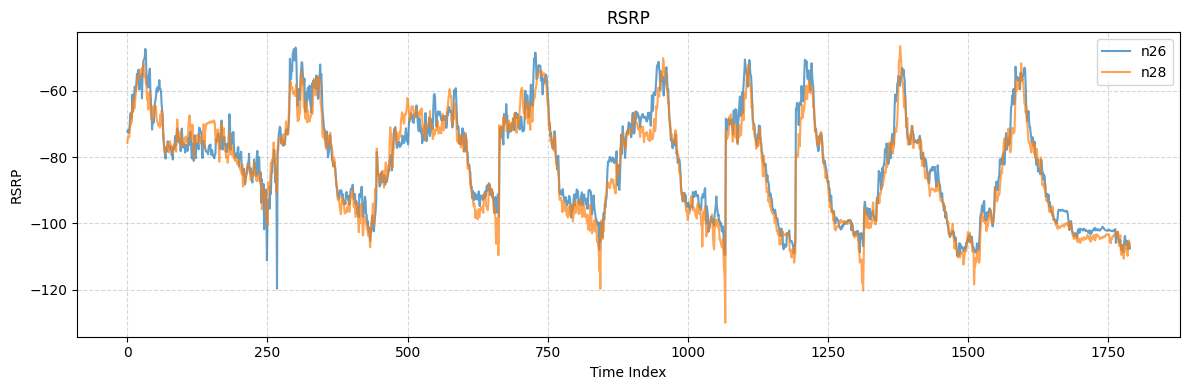

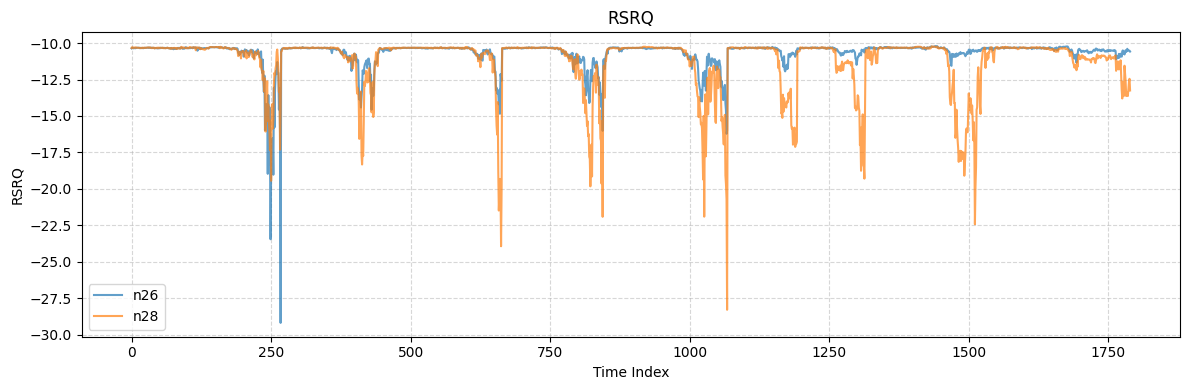

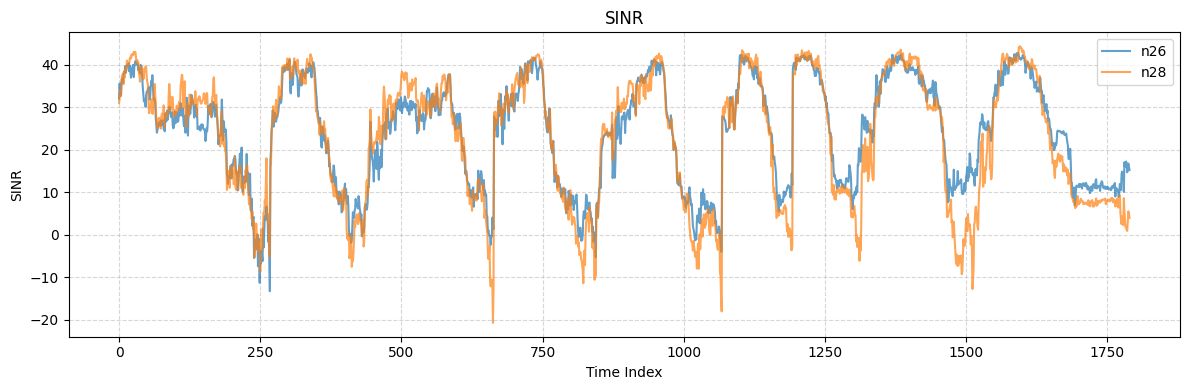

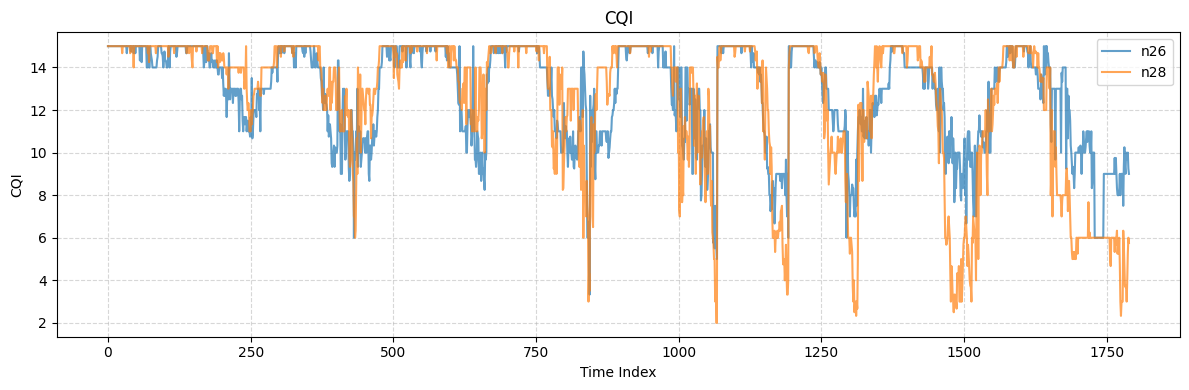

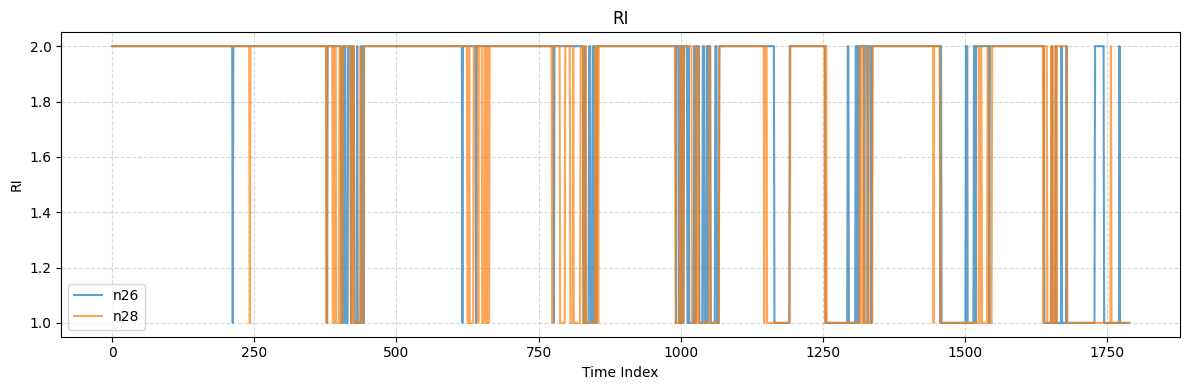

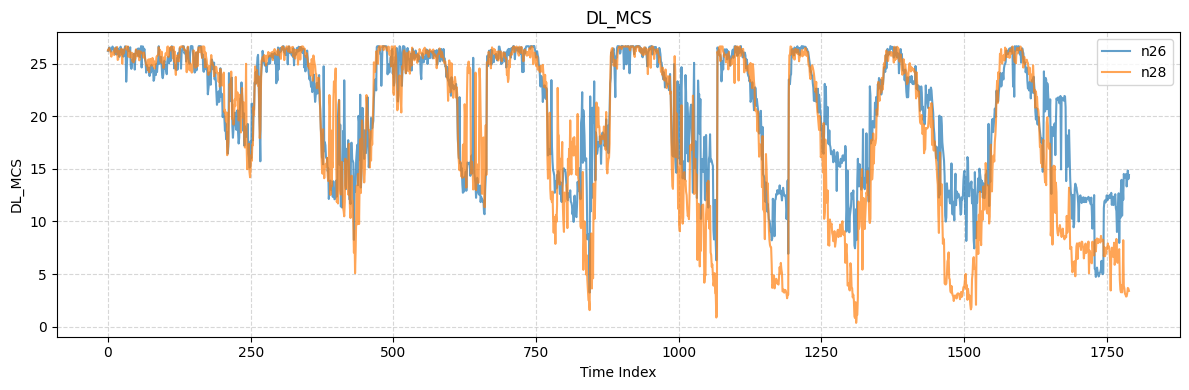

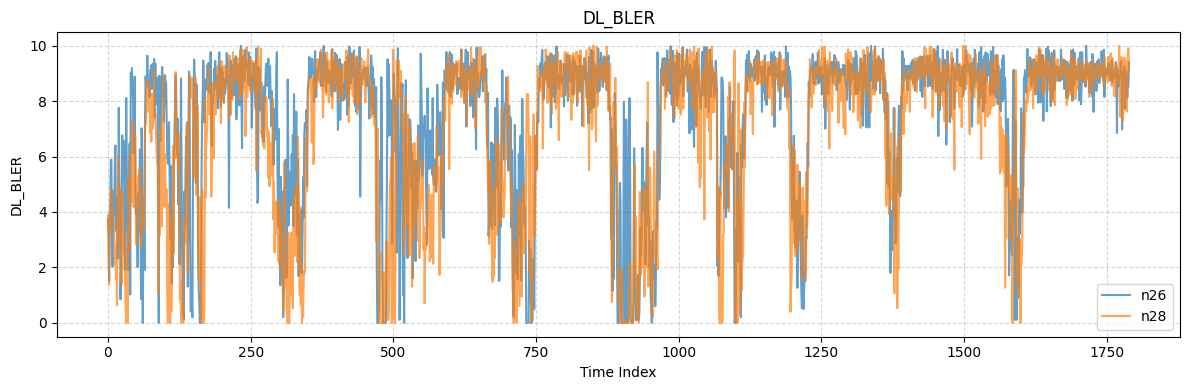

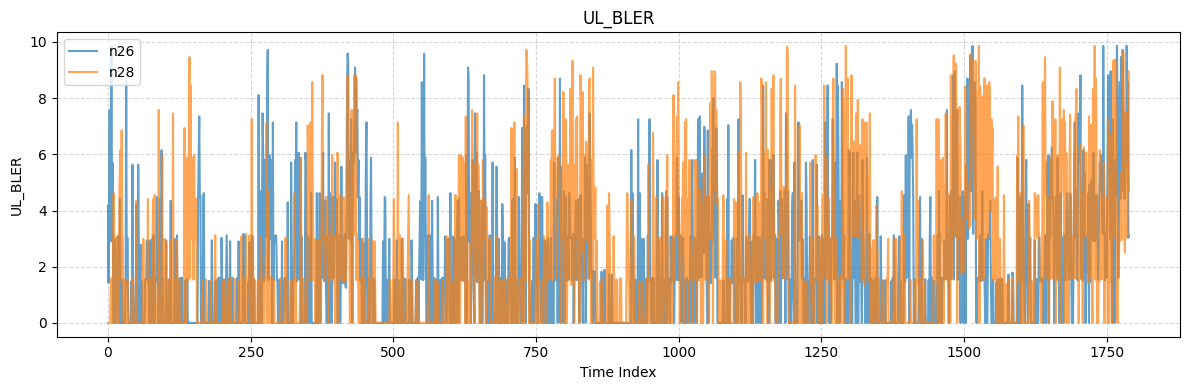

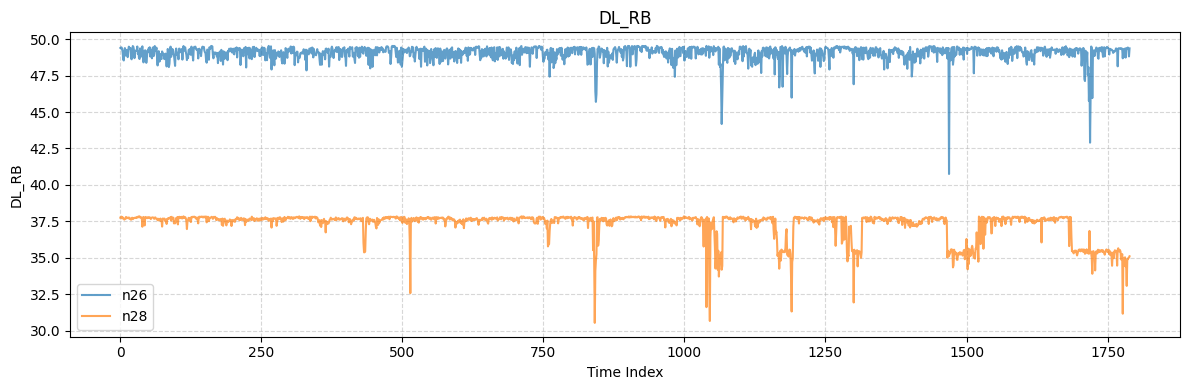

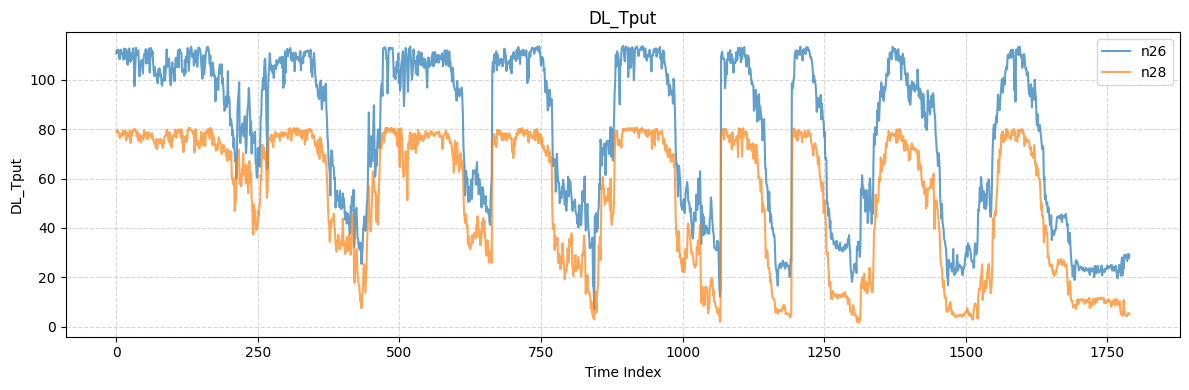

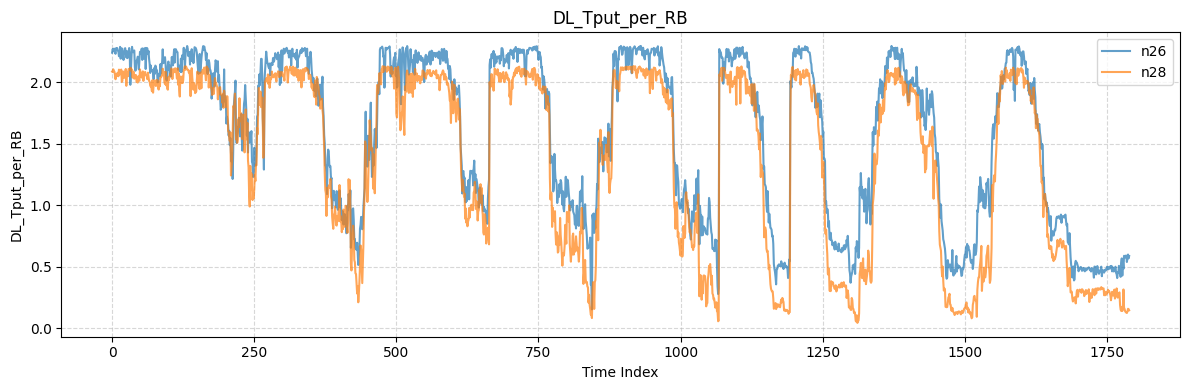

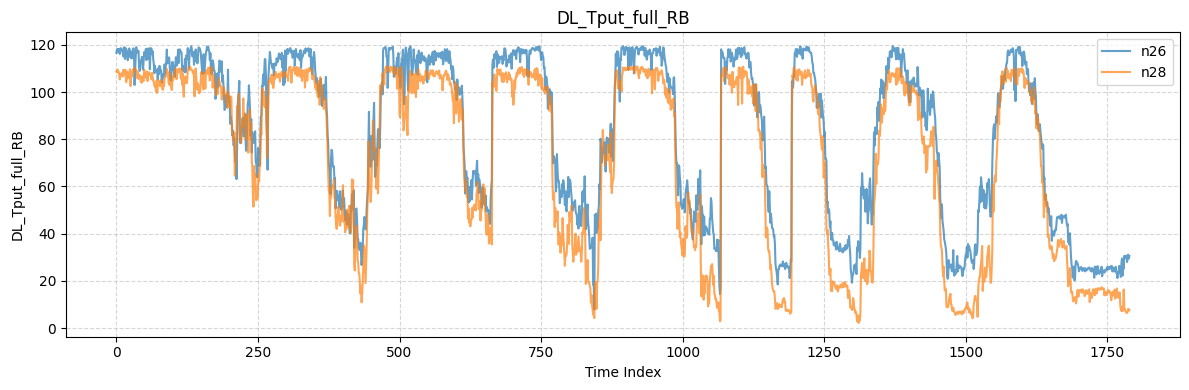

In [4]:
df = analyze_kpi(os.path.join(data_dir, f"merged_SM-S938N.xlsx"))
    
metrics = [
    "RSRP", "RSRQ", "SINR",
    "CQI", "RI", "DL_MCS", 
    "DL_BLER", "UL_BLER",         
    "DL_RB", "DL_Tput",
    "DL_Tput_per_RB",
    "DL_Tput_full_RB",
]

for metric in metrics:
    df_pivot = (
        df.pivot_table(index="TIME", columns="Band", values=metric)
          .dropna()
          .reset_index()
    )

    df_pivot["idx"] = range(len(df_pivot))

    plt.figure(figsize=(12,4))
    plt.plot(df_pivot["idx"], df_pivot["n26"], label="n26", alpha=0.7)
    plt.plot(df_pivot["idx"], df_pivot["n28"], label="n28", alpha=0.7)
    plt.title(f"{metric}")
    plt.xlabel("Time Index")
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

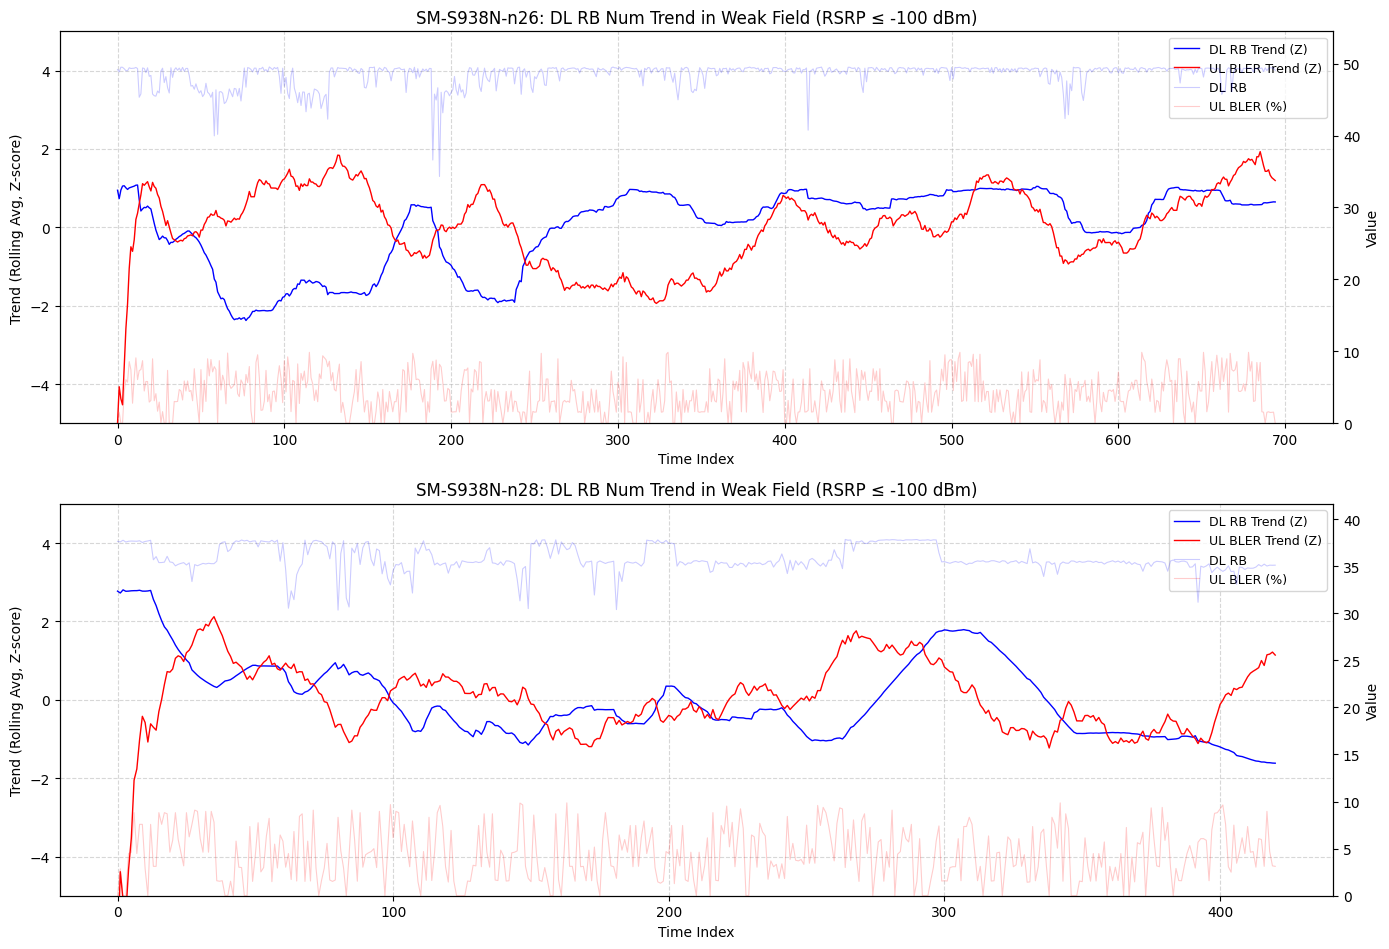

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

df = analyze_kpi(os.path.join(data_dir, f"merged_SM-S938N.xlsx"))

metrics_focus = ["DL_RB", "UL_BLER", "RSRP"]

# subplot 준비 (2행 1열)
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=False)

for i, band in enumerate(["n26", "n28"]):
    df_band = (
        df[df["Band"] == band][["TIME"] + metrics_focus]
        .dropna()
        .reset_index(drop=True)
    )

    # 데이터 처음 50포인트 제거
    df_band = df_band.iloc[50:].reset_index(drop=True)

    # 약전계만 필터
    df_weak = df_band[df_band["RSRP"] <= -100].reset_index(drop=True)
    if df_weak.empty:
        continue

    # 인덱스 추가
    df_weak["idx"] = range(len(df_weak))

    # 이동평균 (트렌드) → Z-score용
    window = 50
    df_weak["DL_RB_trend"] = df_weak["DL_RB"].rolling(window, min_periods=1).mean()
    df_weak["UL_BLER_trend"] = df_weak["UL_BLER"].rolling(window, min_periods=1).mean()

    # Z-score 표준화 (트렌드 기준)
    df_weak["DL_RB_z"] = zscore(df_weak["DL_RB_trend"].fillna(0))
    df_weak["UL_BLER_z"] = zscore(df_weak["UL_BLER_trend"].fillna(0))

    # --- Plot ---
    ax1 = axes[i]                       # subplot 선택
    ax2 = ax1.twinx()                   # twin y-axis (오른쪽 축)

    # 왼쪽 y축 (Z-score)
    ax1.plot(df_weak["idx"], df_weak["DL_RB_z"], 
             label="DL RB Trend (Z)", color="blue", linewidth=1)
    ax1.plot(df_weak["idx"], df_weak["UL_BLER_z"], 
             label="UL BLER Trend (Z)", color="red", linewidth=1)
    ax1.set_ylabel("Trend (Rolling Avg, Z-score)")
    ax1.set_ylim(-5, 5)

    # 오른쪽 y축 (실제 원본 값)
    ax2.plot(df_weak["idx"], df_weak["DL_RB"], 
             color="blue", alpha=0.2, linewidth=0.8, label="DL RB")
    ax2.plot(df_weak["idx"], df_weak["UL_BLER"], 
             color="red", alpha=0.2, linewidth=0.8, label="UL BLER (%)")
    ax2.set_ylabel("Value")
    ax2.set_ylim(0, max(df_weak["DL_RB"].max(), df_weak["UL_BLER"].max()) * 1.1)

    ax1.set_title(f"{device}-{band}: DL RB Num Trend in Weak Field (RSRP ≤ -100 dBm)", fontsize=12)
    ax1.set_xlabel("Time Index")

    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper right", fontsize=9)

    ax1.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(f"DL_RB_Num_Trend.png", dpi=150, bbox_inches="tight", pad_inches=0.3)
plt.show()
plt.close(fig)

In [6]:
def grid_kpi(df, grid_size):
        
    lat_factor, lon_factor = 111320, 88000

    df_grid = df.copy()
    df_grid["lat_bin"] = (df_grid["Lat"] * lat_factor // grid_size).astype(int)
    df_grid["lon_bin"] = (df_grid["Lon"] * lon_factor // grid_size).astype(int)
    df_grid = df_grid.drop(columns=["Lat", "Lon"])

    df_grid = (
        df_grid.groupby(["lat_bin", "lon_bin", "Band"])
          .mean(numeric_only=True)
          .reset_index()
    )
        
    df_grid["loc_id"] = df_grid.groupby(["lat_bin", "lon_bin"]).ngroup()
    df_grid = df_grid[df_grid.groupby("loc_id")["loc_id"].transform("count") == 2]

    cols = ["loc_id", "lat_bin", "lon_bin", "Band"]
    others = [c for c in df_grid.columns if c not in cols]
    df_grid = df_grid[cols+others]

    df_grid = df_grid.reset_index(drop=True)
    # display(df_grid)

    kpi_cols = [
        "RSRP", "RSRQ", "SINR", 
        "CQI", "RI", "DL_MCS", 
        "DL_BLER", "UL_BLER", 
        "DL_RB", "DL_Tput", 
        "DL_Tput_per_RB", "DL_Tput_full_RB"
    ]
    
    df_pair = (
        df_grid.pivot(index=["loc_id", "lat_bin", "lon_bin"], columns="Band", values=kpi_cols)
        .reset_index()
    )
    df_pair.columns = [
        f"{col[0]}_{col[1]}" if col[1] != "" else col[0]
        for col in df_pair.columns.to_flat_index()
    ]
    df_pair = df_pair.reset_index(drop=True)
    # display(df_pair)
  
    return df_grid, df_pair


for device in device_list:
    df = analyze_kpi(os.path.join(data_dir, f"merged_{device}.xlsx"))
    df_grid, df_pair = grid_kpi(df, grid_size=grid_size)
    print(device)
    display(df_grid)
    display(df_pair)
    print()

SM-S938N


,loc_id,lat_bin,lon_bin,Band,RSRP,RSRQ,SINR,CQI,RI,DL_MCS,DL_BLER,UL_BLER,DL_RB,DL_Tput,DL_Tput_per_RB,DL_Tput_full_RB
0,0,167178,446976,n26,-94.598667,-11.288667,7.922667,11.200667,1.600000,15.066000,8.687333,4.336000,49.062000,45.370467,0.924754,48.087182
1,0,167178,446976,n28,-98.222000,-12.802000,2.929000,11.717000,1.600000,12.169000,9.194000,4.566000,37.638000,28.542400,0.757407,39.385178
2,1,167178,446977,n26,-98.587727,-11.348182,6.836364,11.170000,1.272727,17.288182,8.770455,4.233182,49.175909,40.411909,0.821790,42.733086
3,1,167178,446977,n28,-102.183810,-13.030000,3.162857,9.921429,1.000000,8.933810,7.912857,3.859048,35.993333,12.313619,0.339426,17.650137
4,2,167178,446978,n26,-93.486667,-11.430000,6.934167,9.709167,1.916667,13.874167,8.876667,2.570833,49.222500,47.603750,0.967065,50.287382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,128,167197,446979,n28,-85.491818,-13.500000,3.710000,12.340909,2.000000,20.098182,8.585455,1.334545,37.682727,58.909455,1.563062,81.279242
226,129,167197,446980,n26,-91.388889,-15.092222,-1.098889,11.500556,2.000000,18.412778,8.976111,1.067778,49.155556,75.562833,1.537189,79.933827
227,129,167197,446980,n28,-90.967000,-14.323500,-0.267000,13.074500,1.900000,18.382500,8.821000,0.926500,37.610500,49.216400,1.308614,68.047920
228,135,167198,446979,n26,-91.090000,-15.790000,-3.000000,12.000000,2.000000,20.660000,8.990000,1.560000,49.360000,85.720000,1.736629,90.304700


,loc_id,lat_bin,lon_bin,RSRP_n26,RSRP_n28,RSRQ_n26,RSRQ_n28,SINR_n26,SINR_n28,CQI_n26,...,UL_BLER_n26,UL_BLER_n28,DL_RB_n26,DL_RB_n28,DL_Tput_n26,DL_Tput_n28,DL_Tput_per_RB_n26,DL_Tput_per_RB_n28,DL_Tput_full_RB_n26,DL_Tput_full_RB_n28
0,0,167178,446976,-94.598667,-98.222000,-11.288667,-12.802000,7.922667,2.929000,11.200667,...,4.336000,4.566000,49.062000,37.638000,45.370467,28.542400,0.924754,0.757407,48.087182,39.385178
1,1,167178,446977,-98.587727,-102.183810,-11.348182,-13.030000,6.836364,3.162857,11.170000,...,4.233182,3.859048,49.175909,35.993333,40.411909,12.313619,0.821790,0.339426,42.733086,17.650137
2,2,167178,446978,-93.486667,-99.533636,-11.430000,-12.391818,6.934167,3.524545,9.709167,...,2.570833,3.641818,49.222500,37.581818,47.603750,22.505545,0.967065,0.598522,50.287382,31.123149
3,3,167179,446975,-95.928000,-103.900000,-12.656000,-21.203333,1.854000,-15.223333,9.934000,...,2.796000,1.470000,49.028000,37.700000,55.257200,28.049667,1.126773,0.744049,58.592201,38.690544
4,4,167179,446976,-91.476000,-98.959444,-12.306000,-16.941667,4.354667,-3.346667,11.112000,...,2.370667,2.341667,49.157333,37.636667,52.584867,33.168167,1.069585,0.881255,55.618420,45.825272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,121,167197,446962,-109.932308,-114.510000,-12.103846,-18.330000,4.254615,-4.850000,5.493846,...,5.271538,1.850000,44.124615,30.490000,12.719846,2.560000,0.284542,0.083962,14.796168,4.366022
111,127,167197,446978,-89.115714,-88.644545,-15.730000,-13.901818,-1.020000,-0.042727,12.274286,...,1.158571,0.347273,49.195714,37.643182,90.707714,52.284045,1.843223,1.389031,95.847611,72.229601
112,128,167197,446979,-88.601667,-85.491818,-14.650000,-13.500000,-0.535000,3.710000,11.778333,...,0.738333,1.334545,49.095000,37.682727,83.106167,58.909455,1.693761,1.563062,88.075558,81.279242
113,129,167197,446980,-91.388889,-90.967000,-15.092222,-14.323500,-1.098889,-0.267000,11.500556,...,1.067778,0.926500,49.155556,37.610500,75.562833,49.216400,1.537189,1.308614,79.933827,68.047920


In [7]:
import re
import numpy as np
import pandas as pd
import folium
from branca.colormap import StepColormap
import matplotlib
import os

def make_step_cmap(vmin, vmax, step, caption):
    custom_colors = [
        "#FF0000",  # 빨강
        "#FF9500",  # 오렌지
        "#FFEE00",  # 노랑
        "#7FFF00",  # 연두
        # "#008000",  # 진한 초록
        "#00FFFF",  # 하늘
        "#3399FF",  # 중간 파랑
        "#0000FF",  # 파랑
        "#8B00FF",  # 보라
    ]
    bins = np.arange(vmin, vmax + step, step)
    n_bins = len(bins) - 1
    # print(bins, n_bins, len(custom_colors))

    if len(custom_colors) == n_bins:
        colors = custom_colors
    else: # 색상 수가 다르면 자동 보간
        cmap = matplotlib.colors.LinearSegmentedColormap.from_list("custom", custom_colors, N=n_bins)
        colors = [cmap(i / (n_bins - 1)) for i in range(n_bins)]

    return StepColormap(
        colors=colors,
        index=bins,
        vmin=vmin, vmax=vmax,
        caption=caption
    )

# from matplotlib import cm
# def make_step_cmap(vmin, vmax, step, caption):
#     bins = np.arange(vmin, vmax + step, step)
#     n_bins = len(bins) - 1

#     base_cmap = cm.get_cmap("Set1", n_bins)   # "tab10" 대신 "Set1", "Dark2" 등도 가능
#     colors = [matplotlib.colors.rgb2hex(base_cmap(i)) for i in range(n_bins)]

#     return StepColormap(
#         colors=colors,
#         index=bins,
#         vmin=vmin, vmax=vmax,
#         caption=caption
#     )

def add_basestation(map_name):
    # 기지국 위치
    site_lat, site_lon = 37.5472288, 126.9815217
    folium.Marker(
        [site_lat, site_lon],
        icon=folium.Icon(color="black", icon="signal"),
        popup="n26/n28 Cell"
    ).add_to(map_name)
    
def render_step_map(lat, lon, values, popup_func, cmap, out_file, caption):
    m = folium.Map(location=[np.mean(lat), np.mean(lon)], zoom_start=15, tiles="cartodbpositron")
    bounds = []

    for idx, val in enumerate(values):
        if pd.isna(val):
            continue
        color = cmap(val)
        popup = folium.Popup(popup_func(idx, val), max_width=300)
        folium.CircleMarker(
            [lat.iloc[idx], lon.iloc[idx]],
            radius=grid_size*0.5, 
            # color=color,
            stroke=False,
            fill=True, fill_color=color, fill_opacity=0.9,
            popup=popup
        ).add_to(m)
        bounds.append([lat.iloc[idx], lon.iloc[idx]])

    cmap.caption = caption
    cmap.add_to(m)
    if bounds:
        m.fit_bounds(bounds, padding=(20, 20))
    add_basestation(m)
    m.save(out_file)
    print(f"Saved: {out_file} (rows={len(values)})")

def map_kpi(df, device, grid_size, out_dir):
    os.makedirs(out_dir, exist_ok = True)
    device_dir = os.path.join(out_dir, device)
    os.makedirs(device_dir, exist_ok=True)
    
    df_grid, df_pair = grid_kpi(df, grid_size=grid_size)        
    # display(df_pair)
    
    lat_factor, lon_factor = 111320, 88000
    lat = (df_pair["lat_bin"] + 0.5) * (grid_size / lat_factor)
    lon = (df_pair["lon_bin"] + 0.5) * (grid_size / lon_factor)
    
    metrics_pct = [
        # "DL_Tput",
        # "DL_Tput_per_RB",
        "DL_Tput_full_RB",
    ]

    # ratio pct 비교
    for metric_pct in metrics_pct:
        c26 = f"{metric_pct}_n26"
        c28 = f"{metric_pct}_n28"        
        n26 = df_pair[c26].astype(float)
        n28 = df_pair[c28].astype(float)

        ratio = (n28 / n26.replace(0, np.nan)) * 100.0
        ratio = ratio.clip(0, 200)

        plot_df = pd.DataFrame({
            "Lat": lat, "Lon": lon,
            "ratio_pct": ratio,
            "n26": n26, "n28": n28
        }).dropna(subset=["ratio_pct"])

        cmap = make_step_cmap(0, 200, 25, f"{metric_pct} (n28/n26 %)")

        def popup_ratio(idx, val):
            return (
                f"<b>{metric_pct}</b><br>"
                f"n26: {plot_df.iloc[idx]['n26']:.2f}<br>"
                f"n28: {plot_df.iloc[idx]['n28']:.2f}<br>"
                f"<b>n28/n26:</b> {val:.1f} %"
            )
            
        out_file = os.path.join(device_dir, f"ratio_{metric_pct}.html")
        render_step_map(plot_df["Lat"], plot_df["Lon"], plot_df["ratio_pct"], popup_ratio,
                        cmap, out_file, f"{metric_pct} (n28/n26 %)")

    # dB scale 비교
    metrics_db = [
        "RSRP", 
        "RSRQ",
        "SINR", 
        "CQI"
    ]
    
    for metric_db in metrics_db:
        c26 = f"{metric_db}_n26"
        c28 = f"{metric_db}_n28"    
        n26_val = df_pair[c26].astype(float)
        n28_val = df_pair[c28].astype(float)

        diff_db = (n28_val - n26_val).replace([np.inf, -np.inf], np.nan)

        plot_df = pd.DataFrame({
            "Lat": lat, "Lon": lon,
            "diff_db": diff_db,
            "n26": n26_val, "n28": n28_val
        }).dropna(subset=["diff_db"])

        if metric_db == "RSRP":
            cmap_db = make_step_cmap(-6, 6, 1.5, f"{metric_db} Δ(n28−n26) [dB]")
        elif metric_db == "RSRQ":
            cmap_db = make_step_cmap(-12, 12, 3, f"{metric_db} Δ(n28−n26)")
        elif metric_db == "SINR":
            cmap_db = make_step_cmap(-12, 12, 3, f"{metric_db} Δ(n28−n26)")
        elif metric_db == "CQI":
            cmap_db = make_step_cmap(-6, 6, 1.5, f"{metric_db} Δ(n28−n26)")

        def popup_db(idx, val):
            if metric_db == "CQI":
                return (
                    f"<b>{metric_db}</b><br>"
                    f"n26: {plot_df.iloc[idx]['n26']:.1f}<br>"
                    f"n28: {plot_df.iloc[idx]['n28']:.1f}<br>"
                    f"<b>Δ(n28−n26):</b> {val:.1f}"
                )
            else:
                return (
                    f"<b>{metric_db}</b><br>"
                    f"n26: {plot_df.iloc[idx]['n26']:.2f} dB<br>"
                    f"n28: {plot_df.iloc[idx]['n28']:.2f} dB<br>"
                    f"<b>Δ(n28−n26):</b> {val:.2f} dB"
                )

        out_file2 = os.path.join(device_dir, f"diff_{metric_db}.html")
        caption = f"{metric_db} Δ(n28−n26)"
        if metric_db in ["RSRP","RSRQ","SINR"]:
            caption = caption +' [dB]' 
        render_step_map(plot_df["Lat"], plot_df["Lon"], plot_df["diff_db"], popup_db,
                        cmap_db, out_file2, caption)

In [8]:
for device in device_list:
    df = analyze_kpi(os.path.join(data_dir, f"merged_{device}.xlsx"))
    map_kpi(df, device=device, grid_size=grid_size, out_dir=out_dir)

Saved: 250929/bin_25m/SM-S938N/ratio_DL_Tput_full_RB.html (rows=115)
Saved: 250929/bin_25m/SM-S938N/diff_RSRP.html (rows=115)
Saved: 250929/bin_25m/SM-S938N/diff_RSRQ.html (rows=115)
Saved: 250929/bin_25m/SM-S938N/diff_SINR.html (rows=115)
Saved: 250929/bin_25m/SM-S938N/diff_CQI.html (rows=115)


In [9]:
import os

def combine_html(device, out_dir):

    device_dir = os.path.join(out_dir, device)
    rsrp_file = os.path.join(device_dir, "diff_RSRP.html")
    sinr_file = os.path.join(device_dir, "diff_SINR.html")
    out_file  = os.path.join(device_dir, "diff_RSRP_vs_SINR.html")

    html_code = f"""
    <html>
    <head><title>{device} RSRP vs SINR Compare</title>
    <style>
    .container {{
        display: flex;
        flex-direction: row;
        justify-content: space-between;
        align-items: flex-start;
    }}
    .map-box {{
        width: 49%;
        text-align: center;
    }}
    iframe {{
        width: 100%;
        height: 800px;
        border: none;
    }}
    h2 {{
        text-align: center;
        margin-bottom: 20px;
    }}
    h4 {{
        margin-top: 10px;
        margin-bottom: 10px;
    }}
    </style>
    </head>
    <body>
    <h2>{device}: RSRP vs SINR Compare</h2>
    <div class="container">
        <div class="map-box">
            <h4>RSRP Difference (n28-n26)</h4>
            <iframe src="{os.path.basename(rsrp_file)}"></iframe>
        </div>
        <div class="map-box">
            <h4>SINR Difference (n28-n26)</h4>
            <iframe src="{os.path.basename(sinr_file)}"></iframe>
        </div>
    </div>
    </body>
    </html>
    """

    with open(out_file, "w", encoding="utf-8") as f:
        f.write(html_code)
    print(f"✅ Saved: {out_file}")

In [10]:
for device in device_list:
    combine_html(device, out_dir=out_dir)

✅ Saved: 250929/bin_25m/SM-S938N/diff_RSRP_vs_SINR.html


In [11]:
import os
import numpy as np
import pandas as pd
import folium
import matplotlib
from branca.colormap import StepColormap

def add_basestation(map_name):
    # 기지국 위치
    site_lat, site_lon = 37.5472288, 126.9815217
    folium.Marker(
        [site_lat, site_lon],
        icon=folium.Icon(color="black", icon="signal"),
        popup="n26/n28 Cell"
    ).add_to(map_name)
    
def map_coverage(df, device, grid_size, out_dir):
    os.makedirs(out_dir, exist_ok = True)
    device_dir = os.path.join(out_dir, device)
    os.makedirs(device_dir, exist_ok=True)
    temp_dir = os.path.join(device_dir, "temp")
    os.makedirs(temp_dir, exist_ok=True)
    
    df_grid, df_pair = grid_kpi(df, grid_size=grid_size)

    lat_factor, lon_factor = 111320, 88000
    lat = (df_pair["lat_bin"] + 0.5) * (grid_size / lat_factor)
    lon = (df_pair["lon_bin"] + 0.5) * (grid_size / lon_factor)

    metrics = ["RSRP", "RSRQ", "SINR", "CQI","DL_Tput_full_RB"]

    for metric in metrics:
        # print(metric)
        n26_val = df_pair[f"{metric}_n26"].astype(float)
        n28_val = df_pair[f"{metric}_n28"].astype(float)

        vmin = min(n26_val.min(), n28_val.min())
        vmax = max(n26_val.max(), n28_val.max())
        step = (vmax - vmin) / 8

        if metric in ["RSRQ", "SINR"]:
            caption = f"{metric} (dB)"
        elif metric in ["RSRP"]:
            caption = f"{metric} (dBm)"
        elif metric in ["DL_Tput_full_RB"]:
            caption = f"{metric} (Mbps)"
        else:
            caption = metric

        cmap = make_step_cmap(vmin, vmax, step=step, caption=caption) 

        # -------------------
        # n26 지도
        # -------------------
        m1 = folium.Map(location=[np.mean(lat), np.mean(lon)], zoom_start=17, tiles="cartodbpositron")
        for idx in range(len(df_pair)):
            if pd.isna(n26_val.iloc[idx]):
                continue
            color26 = cmap(n26_val.iloc[idx])
            folium.CircleMarker(
                [lat.iloc[idx], lon.iloc[idx]],
                radius=grid_size * 0.5, 
                # color=None, 
                stroke=False,
                fill=True, fill_color=color26, fill_opacity=0.9,
                popup=f"n26 {metric}: {n26_val.iloc[idx]:.1f}"
            ).add_to(m1)
        cmap.add_to(m1)
        add_basestation(m1)
        n26_file = os.path.join(temp_dir, f"{metric}_n26.html")
        m1.save(n26_file)

        # -------------------
        # n28 지도
        # -------------------
        m2 = folium.Map(location=[np.mean(lat), np.mean(lon)], zoom_start=17, tiles="cartodbpositron")
        for idx in range(len(df_pair)):
            if pd.isna(n28_val.iloc[idx]):
                continue
            color28 = cmap(n28_val.iloc[idx])
            folium.CircleMarker(
                [lat.iloc[idx], lon.iloc[idx]],
                radius=grid_size * 0.5, 
                # color=None, 
                stroke=False,
                fill=True, fill_color=color28, fill_opacity=0.9,
                popup=f"n28 {metric}: {n28_val.iloc[idx]:.1f}"
            ).add_to(m2)
        cmap.add_to(m2)
        add_basestation(m2)        
        n28_file = os.path.join(temp_dir, f"{metric}_n28.html")
        m2.save(n28_file)

        # -------------------
        # 합쳐서 비교 HTML 만들기
        # -------------------
        html_code = f"""
        <html>
        <head><title>{device}: {metric} Coverage Compare</title>
        <style>
        .container {{
            display: flex;
            flex-direction: row;
            justify-content: space-between;
            align-items: flex-start;
        }}
        .map-box {{
            width: 49%;
            text-align: center;
        }}
        iframe {{
            width: 100%;
            height: 800px;
            border: none;
        }}
        h2 {{
            margin-bottom: 10px;
        }}
        h4 {{
            margin-top: 10px;
            margin-bottom: 10px;
        }}
        </style>
        </head>
        <body>
        <h2 style="text-align:center;">{device}: {metric} Coverage</h2>
        <div class="container">
            <div class="map-box">
                <h4>n26 (800MHz)</h4>
                <iframe src="temp/{os.path.basename(n26_file)}"></iframe>
            </div>
            <div class="map-box">
                <h4>n28 (700MHz)</h4>
                <iframe src="temp/{os.path.basename(n28_file)}"></iframe>
            </div>
        </div>
        </body>
        </html>
        """

        out_file = os.path.join(device_dir, f"cmpr_{metric}.html")
        with open(out_file, "w", encoding="utf-8") as f:
            f.write(html_code)

        print(f"Saved: {n26_file}")
        print(f"Saved: {n28_file}")
        print(f"Saved: {out_file}")

In [12]:
for device in device_list:
    df = analyze_kpi(os.path.join(data_dir, f"merged_{device}.xlsx"))
    map_coverage(df, device=device, grid_size=grid_size, out_dir=out_dir)

Saved: 250929/bin_25m/SM-S938N/temp/RSRP_n26.html
Saved: 250929/bin_25m/SM-S938N/temp/RSRP_n28.html
Saved: 250929/bin_25m/SM-S938N/cmpr_RSRP.html
Saved: 250929/bin_25m/SM-S938N/temp/RSRQ_n26.html
Saved: 250929/bin_25m/SM-S938N/temp/RSRQ_n28.html
Saved: 250929/bin_25m/SM-S938N/cmpr_RSRQ.html
Saved: 250929/bin_25m/SM-S938N/temp/SINR_n26.html
Saved: 250929/bin_25m/SM-S938N/temp/SINR_n28.html
Saved: 250929/bin_25m/SM-S938N/cmpr_SINR.html
Saved: 250929/bin_25m/SM-S938N/temp/CQI_n26.html
Saved: 250929/bin_25m/SM-S938N/temp/CQI_n28.html
Saved: 250929/bin_25m/SM-S938N/cmpr_CQI.html
Saved: 250929/bin_25m/SM-S938N/temp/DL_Tput_full_RB_n26.html
Saved: 250929/bin_25m/SM-S938N/temp/DL_Tput_full_RB_n28.html
Saved: 250929/bin_25m/SM-S938N/cmpr_DL_Tput_full_RB.html


In [13]:
import matplotlib.pyplot as plt
import numpy as np
import os
import numpy as np
import pandas as pd

def plot_kpi(df, device, grid_size, out_dir):
    os.makedirs(out_dir, exist_ok = True)
    device_dir = os.path.join(out_dir, device)
    os.makedirs(device_dir, exist_ok=True)
    
    df_grid, df_pair = grid_kpi(df, grid_size=grid_size)

    rsrp_col = "RSRP_n28"
    rsrp_min = int(df_pair[rsrp_col].min())
    rsrp_max = int(df_pair[rsrp_col].max())
    bins = np.arange(rsrp_min, rsrp_max + 2, 1)  # 1 dB step
    df_pair["RSRP_bin"] = pd.cut(df_pair["RSRP_n28"], bins=bins, right=False)
    
    df_binned = (
        df_pair.groupby("RSRP_bin", observed=True)
        .mean(numeric_only=True)
        .reset_index()
    )
    df_binned["RSRP_bin_tick"] = df_binned["RSRP_bin"].apply(lambda x: int(x.left))
    
    style_map = {
        "n26": {"marker": "o", "color": "blue"},
        "n28": {"marker": "s", "color": "red"},
    }
    
    # 공통 x축 설정 함수
    def apply_common_axis(ax, df, xlabel, ylabel):
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.invert_xaxis()
        ax.grid(True, linestyle="--", alpha=0.7)
    
        # min/max를 5dB 단위로 맞추기
        x_min = int(df["RSRP_bin_tick"].min())
        x_max = int(df["RSRP_bin_tick"].max())
        x_min_5 = (x_min // 5) * 5
        x_max_5 = (x_max // 5) * 5
    
        xticks = np.arange(x_min_5, x_max_5 + 1, 5)
        ax.set_xticks(xticks)
        ax.set_xticklabels(xticks, rotation=45)
    
    
    # Rx Quality (Absolute + Difference)
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    plt.subplots_adjust(wspace=0.2, hspace=0.32)
    
    # Absoulte
    metrics_group1 = [("RSRP", "RSRP [dBm]"),
                      ("RSRQ", "RSRQ [dB]"),
                      ("SINR", "SINR [dB]")]
    
    for ax, (metric, ylabel) in zip(axes[0], metrics_group1):
        col_n26 = f"{metric}_n26"
        col_n28 = f"{metric}_n28"
        if col_n26 in df_binned.columns and col_n28 in df_binned.columns:
            for source, col in zip(["n26", "n28"], [col_n26, col_n28]):
                style = style_map[source]
                ax.plot(df_binned["RSRP_bin_tick"], df_binned[col],
                        marker=style["marker"], markersize=3,
                        color=style["color"], label=source,
                        linestyle="-", linewidth=1)
            apply_common_axis(ax, df_binned, "RSRP [dBm]", ylabel)
            ax.legend()
            ax.set_title(ylabel, fontsize=12, pad = 8)
    
    # n28 - n26 Difference
    metrics_group_diff = [
        ("RSRP", "RSRP Δ [dB]"),
        ("RSRQ", "RSRQ Δ [dB]"),
        ("SINR", "SINR Δ [dB]")
    ]
    
    for ax, (metric, ylabel) in zip(axes[1], metrics_group_diff):
        col_n26 = f"{metric}_n26"
        col_n28 = f"{metric}_n28"
        if col_n26 in df_binned.columns and col_n28 in df_binned.columns:
            diff = df_binned[col_n28] - df_binned[col_n26]
            ax.plot(df_binned["RSRP_bin_tick"], diff,
                    marker="^", markersize=3,
                    color="green", label=f"{metric} (n28-n26)",
                    linestyle="-", linewidth=1)
            apply_common_axis(ax, df_binned, "RSRP [dBm]", ylabel)
            ax.set_ylim(-20, 20)
            ax.axhline(0, color="black", linestyle="--", linewidth=1)
            ax.legend()
            ax.set_title(ylabel, fontsize=12, pad = 8)
    
    fig.suptitle("Rx Quality (RSRP, RSRQ, SINR)", fontsize=14, y = 0.95)
    plt.savefig(os.path.join(device_dir, f"plot_rx_quality.png"), dpi=150, bbox_inches="tight", pad_inches=0.3)
    plt.show()
    plt.close(fig)
    
    
    # Link Adaptation (CQI, MCS, RI)
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    plt.subplots_adjust(wspace=0.2, hspace=0.32)

    metrics_abs = [
        ("RI", "RI"),
        ("CQI", "CQI"),
        ("DL_MCS", "DL MCS"),
    ]
    metrics_diff = [
        ("RI", "RI Δ"),
        ("CQI", "CQI Δ"),
        ("DL_MCS", "DL MCS Δ"),
    ]
    
    # Absolute
    for ax, (metric, ylabel) in zip(axes[0], metrics_abs):
        col_n26 = f"{metric}_n26"
        col_n28 = f"{metric}_n28"
        if col_n26 in df_binned.columns and col_n28 in df_binned.columns:
            for source, col in zip(["n26", "n28"], [col_n26, col_n28]):
                style = style_map[source]
                ax.plot(df_binned["RSRP_bin_tick"], df_binned[col],
                        marker=style["marker"], markersize=3,
                        color=style["color"], label=source,
                        linestyle="-", linewidth=1)
            apply_common_axis(ax, df_binned, "RSRP [dBm]", ylabel)
            ax.legend()
            ax.set_title(ylabel, fontsize=12, pad = 8)
    
    # delta Δ
    for ax, (metric, ylabel) in zip(axes[1], metrics_diff):
        col_n26 = f"{metric}_n26"
        col_n28 = f"{metric}_n28"
        if col_n26 in df_binned.columns and col_n28 in df_binned.columns:
            diff = df_binned[col_n28] - df_binned[col_n26]
            ax.plot(df_binned["RSRP_bin_tick"], diff,
                    marker="^", markersize=3,
                    color="green", label=f"{metric} (n28−n26)",
                    linestyle="-", linewidth=1)
            apply_common_axis(ax, df_binned, "RSRP [dBm]", ylabel)
    
            if metric == "CQI":
                ax.set_ylim(-10, 10)
            elif metric == "DL_MCS":
                ax.set_ylim(-20, 20)
            elif metric == "RI":
                ax.set_ylim(-1, 1)
            ax.axhline(0, color="black", linestyle="--", linewidth=1)
            ax.legend()
            ax.set_title(ylabel, fontsize=12, pad = 8)
    
    fig.suptitle("Link Adaptation (RI, CQI, DL MCS)", fontsize=14, y=0.95)
    plt.savefig(os.path.join(device_dir, f"plot_link_adaptation.png"), dpi=150, bbox_inches="tight", pad_inches=0.3)
    plt.show()
    plt.close(fig)


    # Interference Impact (SINR, CQI, MCS)
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    plt.subplots_adjust(wspace=0.2, hspace=0.32)
    
    metrics_abs = [
        ("SINR", "SINR [dB]"),
        ("CQI", "CQI"),
        ("DL_MCS", "DL MCS"),
    ]
    metrics_diff = [
        ("SINR", "SINR Δ [dB]"),
        ("CQI", "CQI Δ"),
        ("DL_MCS", "DL MCS Δ"),
    ]
    
    # Absolute plots
    for ax, (metric, ylabel) in zip(axes[0], metrics_abs):
        col_n26 = f"{metric}_n26"
        col_n28 = f"{metric}_n28"
        if col_n26 in df_binned.columns and col_n28 in df_binned.columns:
            for source, col in zip(["n26", "n28"], [col_n26, col_n28]):
                style = style_map[source]
                ax.plot(df_binned["RSRP_bin_tick"], df_binned[col],
                        marker=style["marker"], markersize=3,
                        color=style["color"], label=source,
                        linestyle="-", linewidth=1)
            apply_common_axis(ax, df_binned, "RSRP [dBm]", ylabel)
            ax.legend()
            ax.set_title(ylabel, fontsize=12, pad=8)
    
    # Difference plots
    for ax, (metric, ylabel) in zip(axes[1], metrics_diff):
        col_n26 = f"{metric}_n26"
        col_n28 = f"{metric}_n28"
        if col_n26 in df_binned.columns and col_n28 in df_binned.columns:
            diff = df_binned[col_n28] - df_binned[col_n26]
            ax.plot(df_binned["RSRP_bin_tick"], diff,
                    marker="^", markersize=3,
                    color="green", label=f"{metric} (n28−n26)",
                    linestyle="-", linewidth=1)
            apply_common_axis(ax, df_binned, "RSRP [dBm]", ylabel)
    
            # metric-specific y-limits
            if metric == "SINR":
                ax.set_ylim(-20, 20)
            elif metric == "CQI":
                ax.set_ylim(-10, 10)
            elif metric == "DL_MCS":
                ax.set_ylim(-20, 20)
    
            ax.axhline(0, color="black", linestyle="--", linewidth=1)
            ax.legend()
            ax.set_title(ylabel, fontsize=12, pad=8)
    
    fig.suptitle("Interference Impact (SINR, CQI, MCS)", fontsize=14, y=0.95)
    plt.savefig(os.path.join(device_dir, f"plot_interfere_impact.png"), dpi=150, bbox_inches="tight", pad_inches=0.3)
    plt.show()
    plt.close(fig)

    # # DL BLER, UL BLER, DL RB
    # fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    # plt.subplots_adjust(wspace=0.25)
    
    # metrics_group = [
    #     ("DL_BLER", "DL BLER [%]"),
    #     ("UL_BLER", "UL BLER [%]"),
    #     ("DL_RB", "DL RB Num"),
    # ]
    
    # for ax, (metric, ylabel) in zip(axes, metrics_group):
    #     col_n26 = f"{metric}_n26"
    #     col_n28 = f"{metric}_n28"
    #     if col_n26 in df_binned.columns and col_n28 in df_binned.columns:
    #         for source, col in zip(["n26", "n28"], [col_n26, col_n28]):
    #             style = style_map[source]
    #             ax.plot(df_binned["RSRP_bin_tick"], df_binned[col],
    #                     marker=style["marker"], markersize=3,
    #                     color=style["color"], label=source,
    #                     linestyle="-", linewidth=1)
    #         apply_common_axis(ax, df_binned, "RSRP [dBm]", ylabel)
    #         ax.legend()
    #         ax.set_title(ylabel, fontsize=12, pad=8)
    
    # # fig.suptitle("DL/UL BLER, DL RB Num", fontsize=14, y=0.99)
    # plt.savefig(os.path.join(device_dir, f"plot_BLER_RB.png"), dpi=150, bbox_inches="tight", pad_inches=0.3)
    # plt.close(fig)

    
    # Throughput
    fig, axes = plt.subplots(1, 2, figsize=(13, 4))
    plt.subplots_adjust(wspace=0.25)

    metric = "DL_Tput_full_RB"
    col_n26 = f"{metric}_n26"
    col_n28 = f"{metric}_n28"
    
    # Absolute Throughput
    ax = axes[0]
    for source, col in zip(["n26", "n28"], [col_n26, col_n28]):
        style = style_map[source]
        ax.plot(df_binned["RSRP_bin_tick"], df_binned[col],
                marker=style["marker"], markersize=3,
                color=style["color"], label=source,
                linestyle="-", linewidth=1)
    apply_common_axis(ax, df_binned, "RSRP [dBm]", "DL Tput [Mbps]")
    ax.legend()
    # ax.set_title("Absolute DL Tput", fontsize=10, pad=7)
    
    # Relative Throughput
    ax = axes[1]
    if col_n26 in df_binned.columns and col_n28 in df_binned.columns:
        rel_ratio = (df_binned[col_n28] / df_binned[col_n26]) * 100
        ax.plot(df_binned["RSRP_bin_tick"], rel_ratio,
                marker="s", markersize=3, color="green", label="n28/n26 [%]",
                linestyle="-", linewidth=1)
    apply_common_axis(ax, df_binned, "RSRP [dBm]", "DL Tput Ratio [%]")
    ax.legend()
    # ax.set_title("Relative DL Tput", fontsize=10, pad=7)
    
    fig.suptitle("DL Throughput (Full RB)", fontsize=14, y=0.98)
    
    plt.savefig(os.path.join(device_dir, f"plot_{metric}.png"), dpi=150, bbox_inches="tight", pad_inches=0.3)
    plt.show()
    plt.close(fig)

SM-S938N


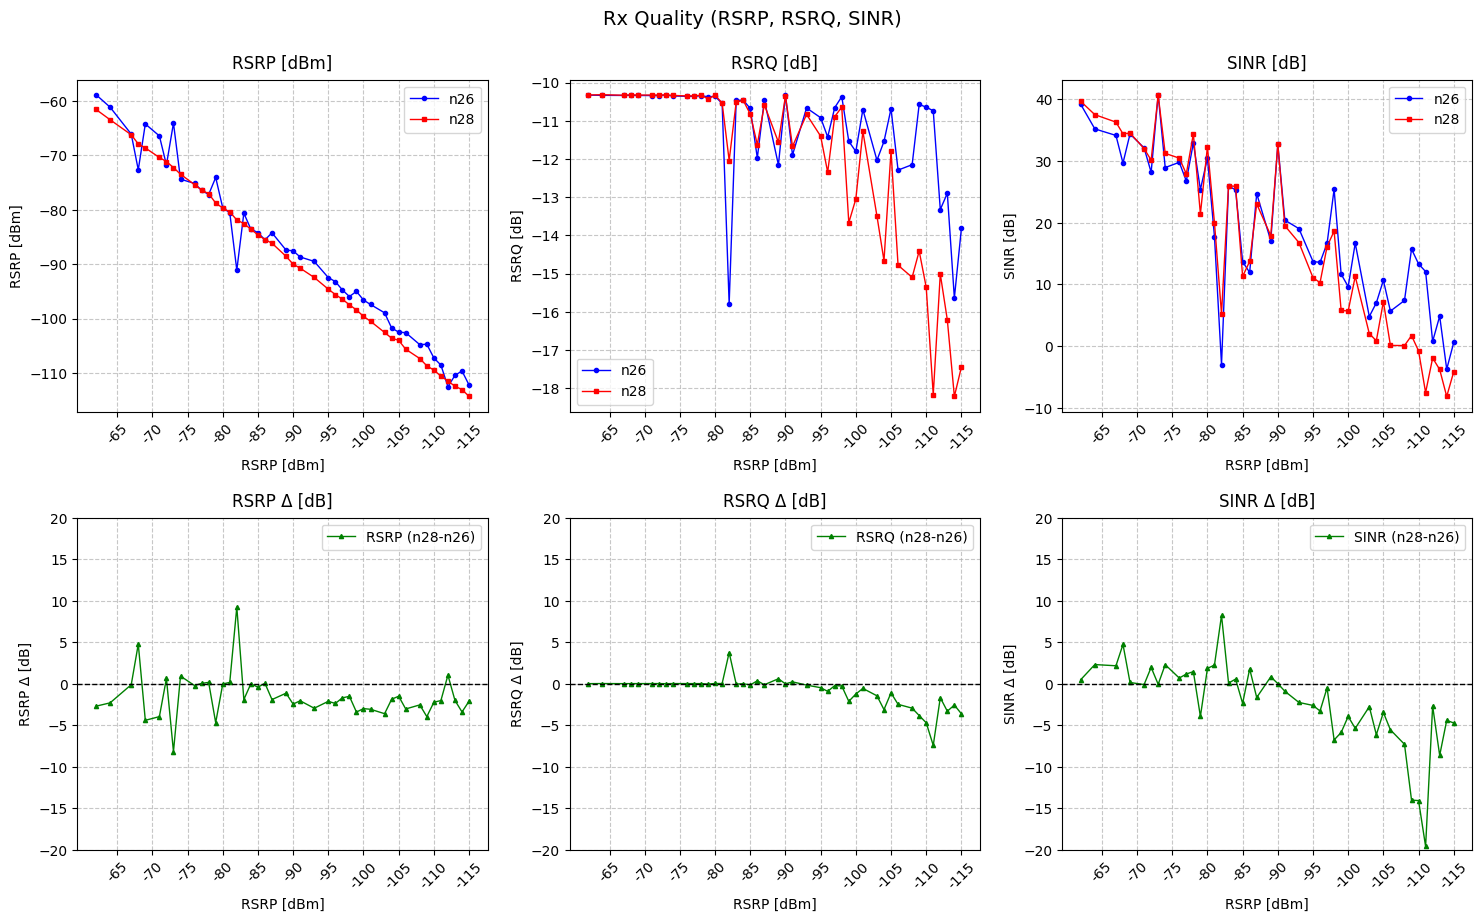

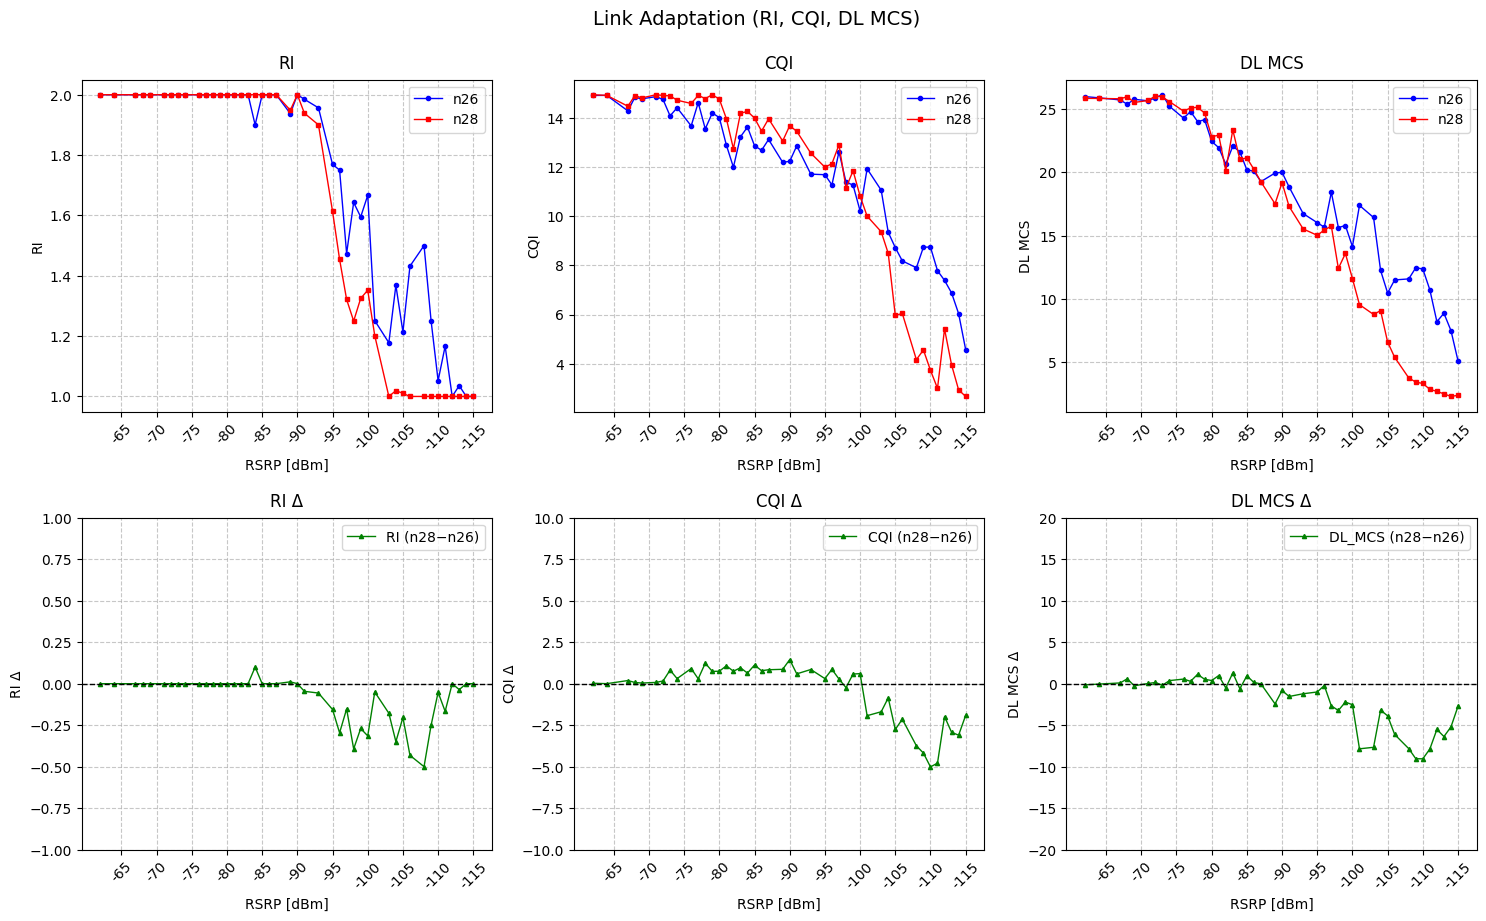

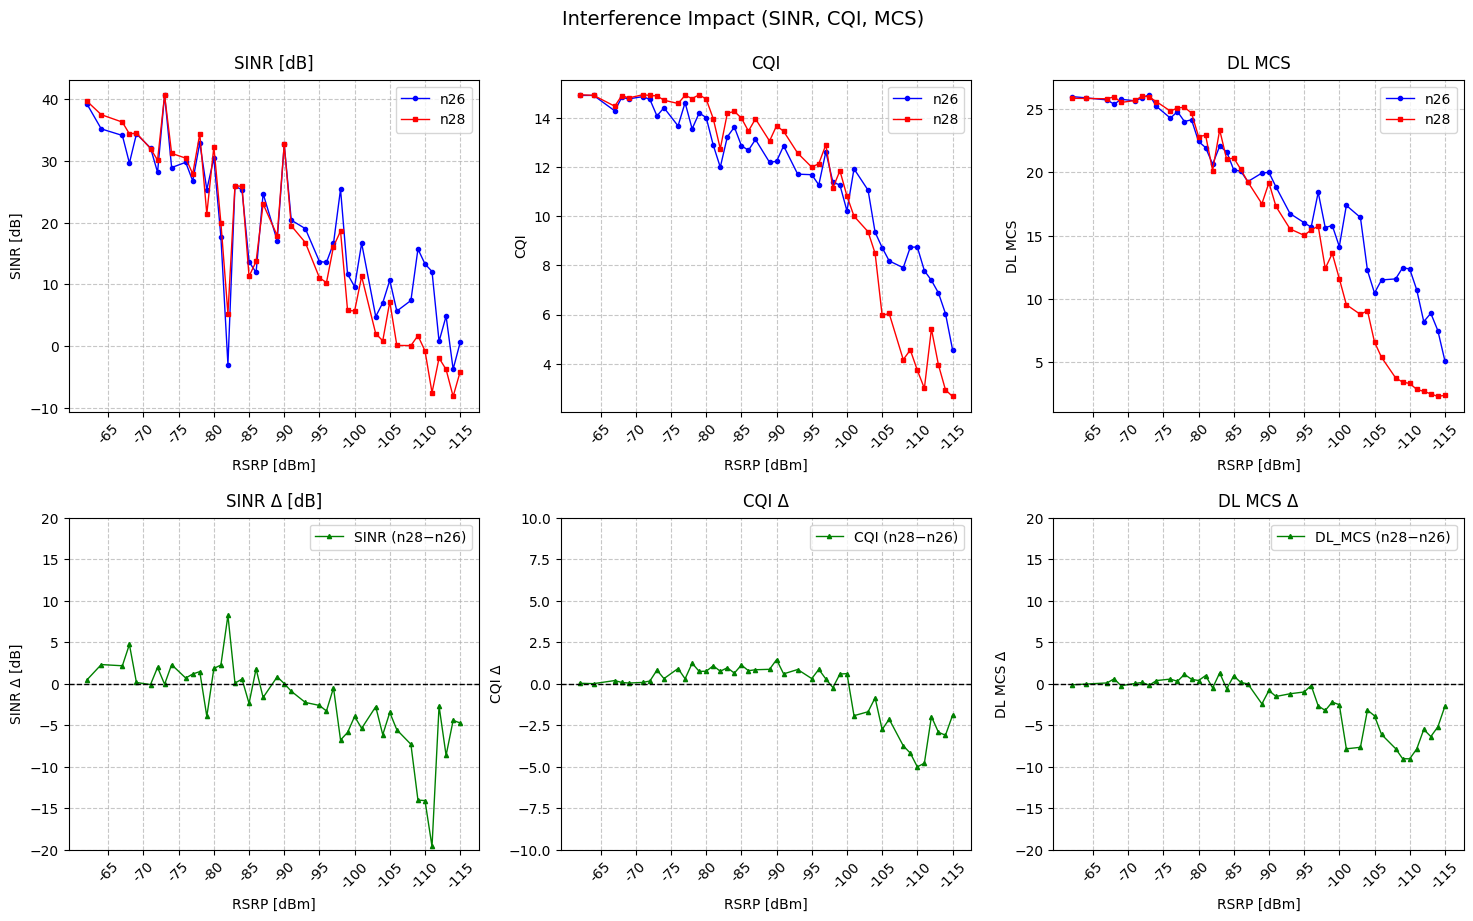

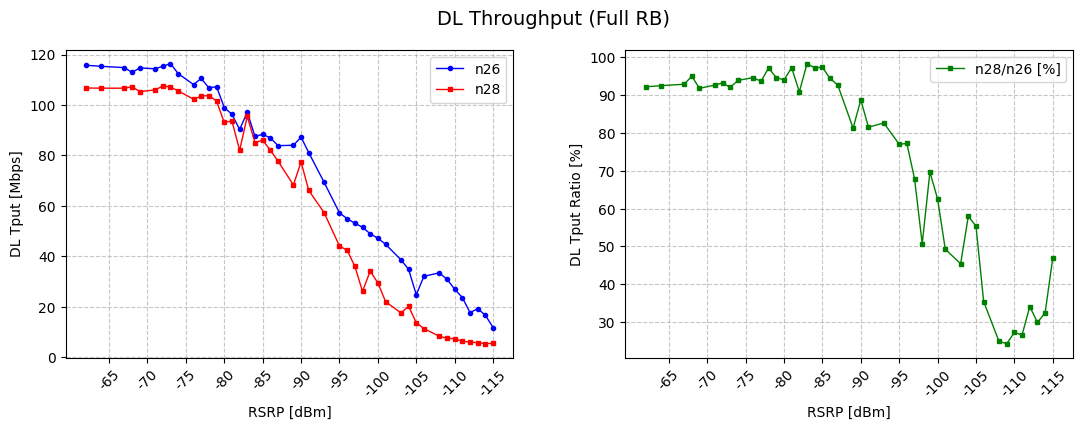

In [14]:
for device in device_list:
    df = analyze_kpi(os.path.join(data_dir, f"merged_{device}.xlsx"))
    print(device)
    plot_kpi(df, device=device, grid_size=grid_size, out_dir=out_dir)